
# 📈 Stock Price Forecasting Project

This project analyzes and forecasts stock market trends using four time series models: **ARIMA**, **SARIMA**, **Facebook Prophet**, and **LSTM**.

### 📌 Key Steps:
- Load and preprocess historical stock data from Yahoo Finance
- Apply and evaluate ARIMA, SARIMA, Prophet, and LSTM
- Calculate MAE and RMSE for each model
- Compare model performance in a table

In [3]:
# STEP 1: Install and import needed packages
!pip install yfinance pandas matplotlib

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# STEP 2: Download Apple stock prices
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')

# Show the first few rows
print(data.head())


C:\Users\chiko\AppData\Local\Temp\ipykernel_9044\4138477843.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620850  72.681296  71.373226  71.627100  135480400
2020-01-03  71.914818  72.676447  71.689957  71.847118  146322800
2020-01-06  72.487839  72.526526  70.783241  71.034702  118387200
2020-01-07  72.146927  72.753808  71.926900  72.497514  108872000
2020-01-08  73.307518  73.609752  71.849540  71.849540  132079200


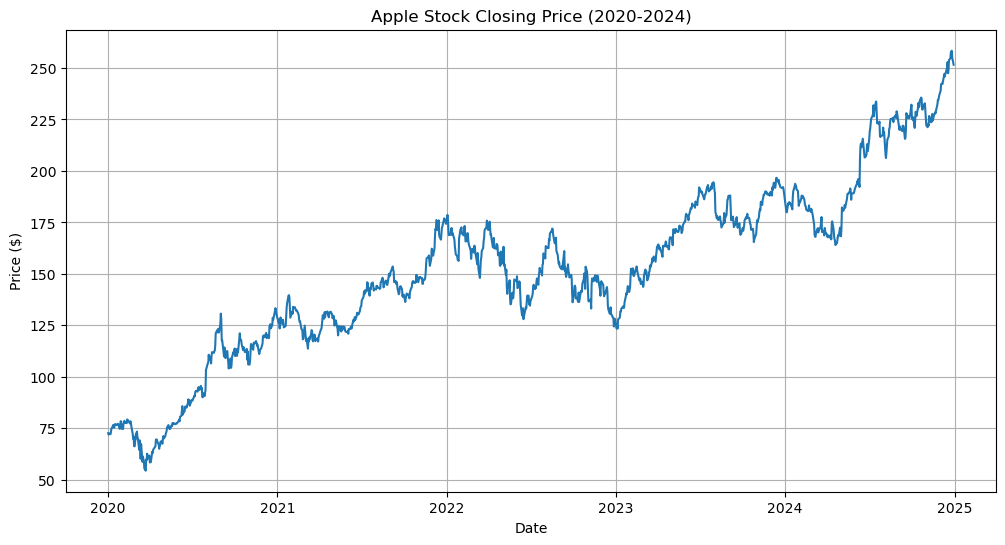

In [7]:
# STEP 3: Plot the closing prices
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title("Apple Stock Closing Price (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


In [9]:
!pip install prophet

# PROPHET MODEL


19:25:16 - cmdstanpy - INFO - Chain [1] start processing
19:25:17 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\chiko\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


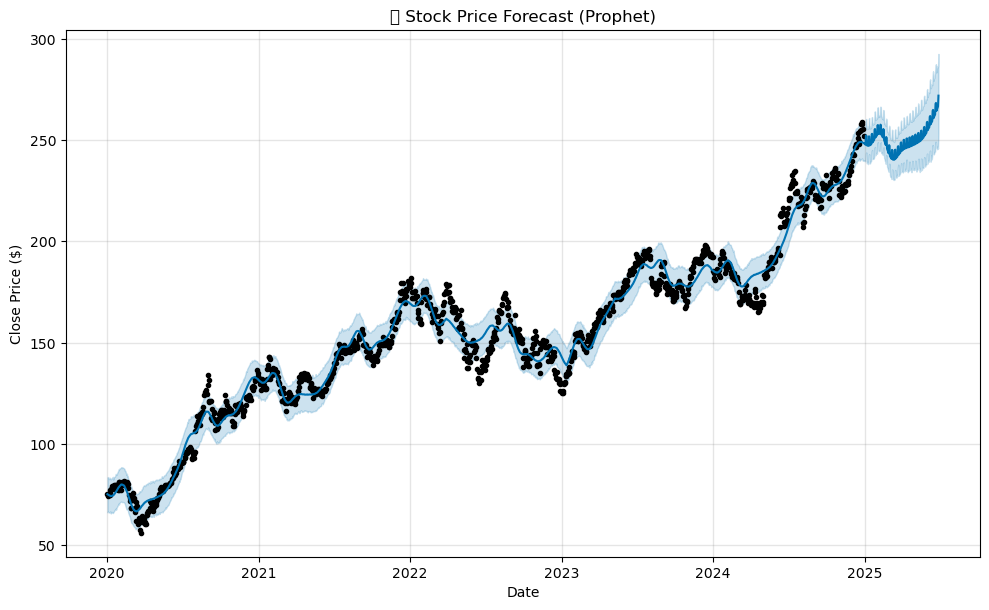

📊 Prophet Evaluation:
MAE: 5.09
RMSE: 6.62


In [58]:
# 📦 Import libraries
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# ✅ Assume 'data' already contains the stock data with Date index and 'Close' column
# Example: data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')

# ✅ Step 1: Prepare data for Prophet
df = pd.DataFrame()
df['ds'] = data.index                 # Prophet expects 'ds' for datetime
df['y'] = data['Close'].values        # Prophet expects 'y' for target variable
df.dropna(inplace=True)               # Drop missing values if any

# ✅ Step 2: Initialize and train the model
model = Prophet()
model.fit(df)

# ✅ Step 3: Forecast for future 180 days
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# ✅ Step 4: Plot the forecast
model.plot(forecast)
plt.title("📈 Stock Price Forecast (Prophet)")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.grid(True)
plt.show()

# ✅ Step 5: Evaluate on available data
df_eval = pd.merge(df, forecast[['ds', 'yhat']], on='ds', how='inner')

# Calculate MAE and RMSE
mae_prophet = mean_absolute_error(df_eval['y'], df_eval['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(df_eval['y'], df_eval['yhat']))

print(f"📊 Prophet Evaluation:")
print(f"MAE: {mae_prophet:.2f}")
print(f"RMSE: {rmse_prophet:.2f}")


# LSTM MODEL

In [13]:
!pip install tensorflow scikit-learn


Epoch 1/10


C:\Users\chiko\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0719
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0027
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0011
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 8.6398e-04
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 8.7840e-04
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 8.4293e-04
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 8.3246e-04
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 8.3698e-04
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 9.1731e-04
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 7.3146e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


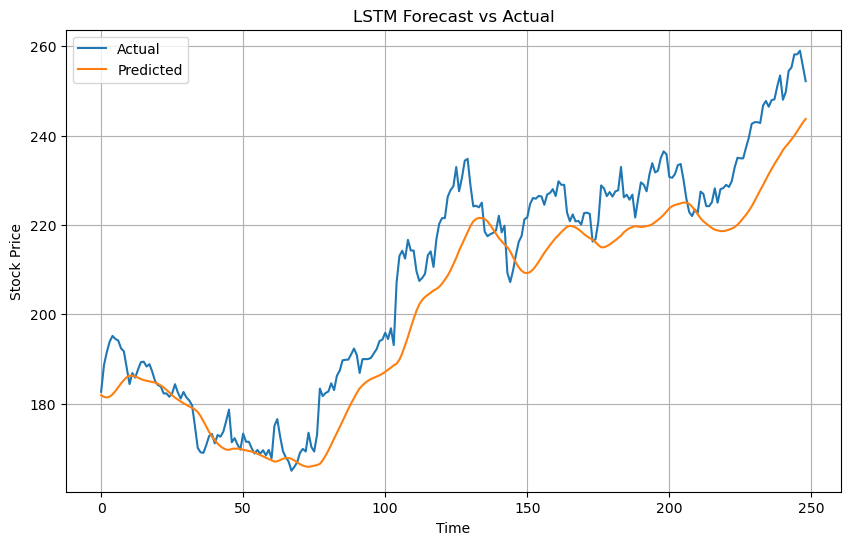

📊 LSTM Evaluation:
MAE: 7.90
RMSE: 9.76


In [60]:
# 📦 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# ✅ Step 1: Prepare data
data_lstm = data[['Close']].copy()
data_lstm.dropna(inplace=True)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_lstm)

# Create sequences (60 time steps)
X = []
y = []
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# ✅ Step 2: Split into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ✅ Step 3: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# ✅ Step 4: Make predictions
predicted_stock_price = model.predict(X_test)

# Inverse transform to get actual prices
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_stock_price_actual = scaler.inverse_transform(predicted_stock_price)

# ✅ Step 5: Plot predictions vs actual
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual')
plt.plot(predicted_stock_price_actual, label='Predicted')
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Step 6: Evaluate
mae_lstm = mean_absolute_error(y_test_actual, predicted_stock_price_actual)
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, predicted_stock_price_actual))

print(f"📊 LSTM Evaluation:")
print(f"MAE: {mae_lstm:.2f}")
print(f"RMSE: {rmse_lstm:.2f}")


In [25]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [43]:
import yfinance as yf
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BDay

# Step 1: Download historical stock data
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31', auto_adjust=False)

# Step 2: Convert index to datetime if not already
data.index = pd.to_datetime(data.index)

# Step 3: Reindex to full business day range
full_bdays = pd.date_range(start=data.index.min(), end=data.index.max(), freq='B')
data = data.reindex(full_bdays)

# Step 4: Forward fill missing values (common after reindexing)
data = data.ffill()

# Step 5: Final time series prep
ts_data = data[['Close']]
ts_data.index.freq = 'B'  # ✅ This will now work




[*********************100%***********************]  1 of 1 completed


# ARIMA MODEL

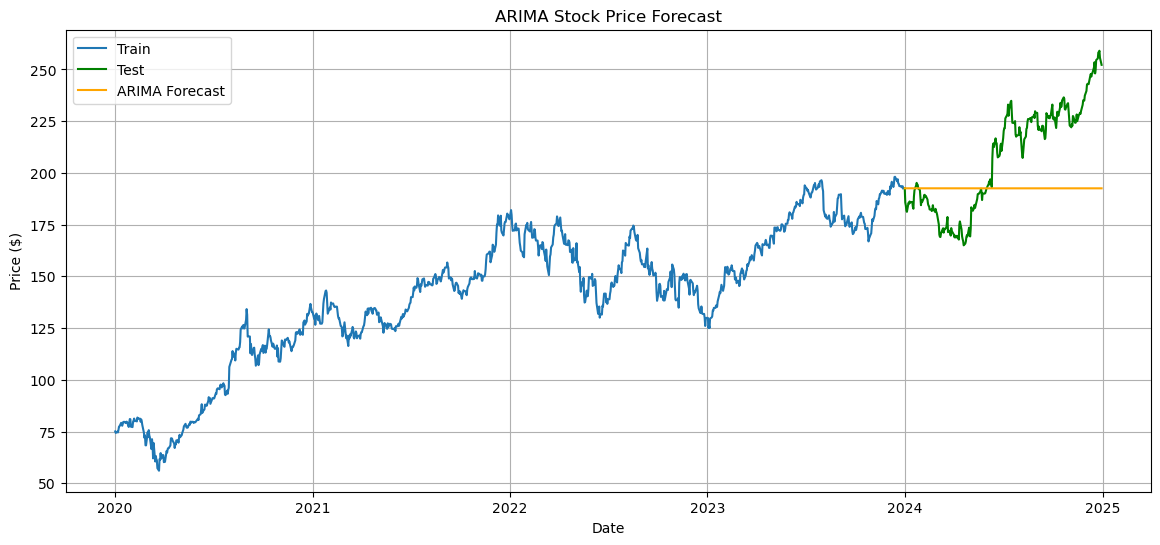

✅ ARIMA Evaluation:
MAE: 24.83
RMSE: 29.26


In [45]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train-test split
train_size = int(len(ts_data) * 0.8)
train = ts_data.iloc[:train_size]['Close']
test = ts_data.iloc[train_size:]['Close']

# Fit ARIMA
model_arima = ARIMA(train, order=(5, 1, 0))
model_fit = model_arima.fit()

# Forecast
forecast_arima = model_fit.forecast(steps=len(test))
forecast_arima = forecast_arima.dropna()

# Align
min_len = min(len(test), len(forecast_arima))
test = test[:min_len]
forecast_arima = forecast_arima[:min_len]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='green')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast', color='orange')
plt.title("ARIMA Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
mae = mean_absolute_error(test, forecast_arima)
rmse = np.sqrt(mean_squared_error(test, forecast_arima))
print(f"✅ ARIMA Evaluation:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}")



In [32]:
pip install pmdarima


   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.7 MB 3.7 MB/s eta 0:00:01
   ----------------------- ---------------- 1.6/2.7 MB 3.8 MB/s eta 0:00:01
   ----------------------------------- ---- 2.4/2.7 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# SARIMA MODEL

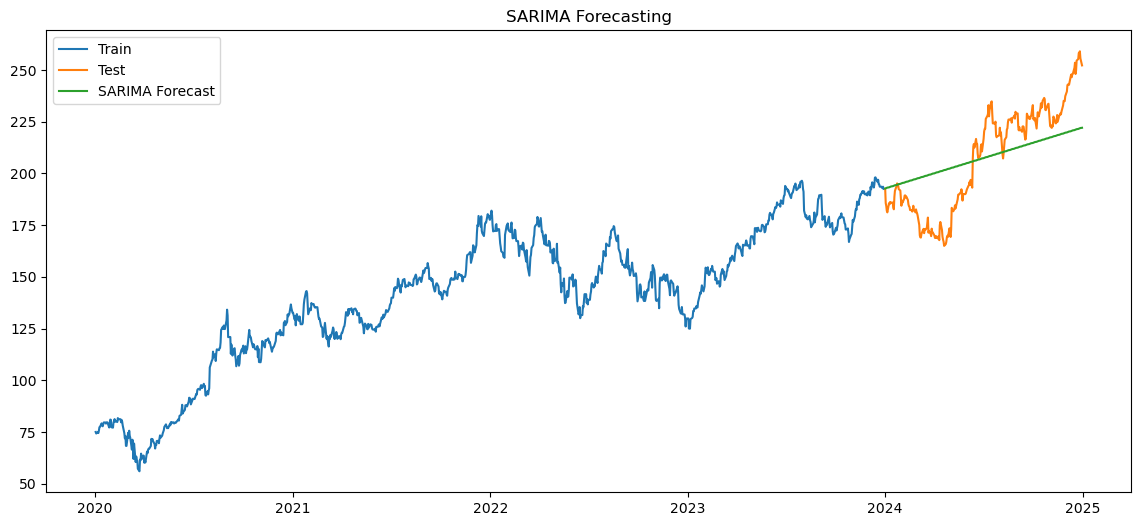

SARIMA MAE: 15.78, RMSE: 18.26


In [50]:
import pmdarima as pm

# Auto-select SARIMA parameters (this can take a few seconds)
model_sarima = pm.auto_arima(
    train,
    seasonal=True,
    m=12,  # monthly seasonality; use m=5/7 if weekly, m=252 if daily stock data
    stepwise=True,
    suppress_warnings=True
)

# Forecast same number of steps as test set
forecast_sarima = model_sarima.predict(n_periods=len(test))

# Plot
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast_sarima, label='SARIMA Forecast')
plt.title("SARIMA Forecasting")
plt.legend()
plt.show()

# Evaluation
mae_sarima = mean_absolute_error(test, forecast_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima))
print(f"SARIMA MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}")


# Comparison table

In [62]:
import pandas as pd

# Replace with your real results
results = {
    'Model': ['ARIMA', 'SARIMA', 'Prophet', 'LSTM'],
    'MAE': [24.83, 15.78, 5.09, 7.90],
    'RMSE': [29.26, 18.26,6.62, 9.76]
}

results_df = pd.DataFrame(results)
print(results_df)


     Model    MAE   RMSE
0    ARIMA  24.83  29.26
1   SARIMA  15.78  18.26
2  Prophet   5.09   6.62
3     LSTM   7.90   9.76


In [64]:
pip install pmdarima


# TUNING ARIMA MODEL

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4947.863, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4946.945, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4946.664, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4946.528, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4946.904, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4947.770, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4949.709, Time=1.25 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4946.700, Time=0.20 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.642 seconds
Best ARIMA order: (0, 1, 1)


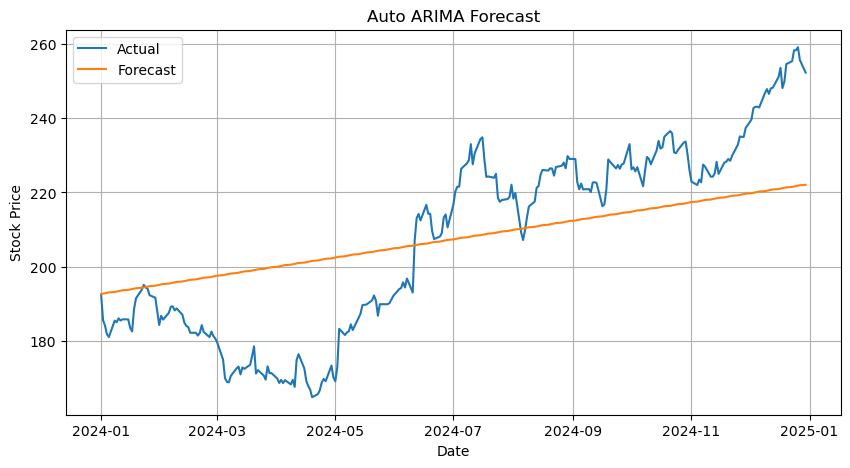

🔧 Tuned ARIMA Evaluation:
MAE: 15.78
RMSE: 18.26


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ✅ Use your time series data
ts_data = data[['Close']].copy()
ts_data.index = pd.to_datetime(ts_data.index)
ts_data.dropna(inplace=True)

# ✅ Train-test split
split_idx = int(len(ts_data) * 0.8)
ts_train, ts_test = ts_data[:split_idx], ts_data[split_idx:]

# ✅ Run auto_arima to find best (p, d, q)
stepwise_model = auto_arima(ts_train, 
                             start_p=1, start_q=1,
                             max_p=5, max_q=5,
                             seasonal=False,
                             d=None,  # automatically determine differencing
                             trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True)

# ✅ Print best order
print("Best ARIMA order:", stepwise_model.order)

# ✅ Forecast
n_periods = len(ts_test)
forecast_arima = stepwise_model.predict(n_periods=n_periods)

# ✅ Plot results
plt.figure(figsize=(10,5))
plt.plot(ts_test.index, ts_test.values, label='Actual')
plt.plot(ts_test.index, forecast_arima, label='Forecast')
plt.title("Auto ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Evaluate
mae_arima_tuned = mean_absolute_error(ts_test, forecast_arima)
rmse_arima_tuned = np.sqrt(mean_squared_error(ts_test, forecast_arima))

print(f"🔧 Tuned ARIMA Evaluation:")
print(f"MAE: {mae_arima_tuned:.2f}")
print(f"RMSE: {rmse_arima_tuned:.2f}")


# TUNING SARIMA MODEL

In [80]:
from pmdarima import auto_arima

sarima_model = auto_arima(ts_train,
                          seasonal=True,
                          m=12,                 # seasonality period (try 7 or 12 or 30)
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

print("Best SARIMA order:", sarima_model.order)
print("Best Seasonal Order:", sarima_model.seasonal_order)

# Forecast
forecast_sarima = sarima_model.predict(n_periods=len(ts_test))

# Evaluate
mae_sarima_tuned = mean_absolute_error(ts_test, forecast_sarima)
rmse_sarima_tuned = np.sqrt(mean_squared_error(ts_test, forecast_sarima))

# 4. Print results
print(f"Tuned SARIMA MAE: {mae_sarima_tuned:.2f}")
print(f"Tuned SARIMA RMSE: {rmse_sarima_tuned:.2f}")



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=7.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4946.945, Time=0.16 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4948.598, Time=0.72 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4948.455, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4946.904, Time=0.16 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4948.888, Time=0.58 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4948.882, Time=0.42 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4950.577, Time=1.25 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4946.664, Time=0.34 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4948.592, Time=0.59 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4950.325, Time=1.46 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=4947.828, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=4947.863, Time=0.74 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4946.528, Time=0.33 sec
 ARIMA(0,1,1)(1,0,0)[12]

# TUNING PROPHET MODEL

In [74]:
from prophet import Prophet

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.1  # try 0.01 to 0.5
)

model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(df)

# Forecast & Evaluate
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)
df_eval = pd.merge(df, forecast[['ds', 'yhat']], on='ds')
mae_prophet_tuned = mean_absolute_error(df_eval['y'], df_eval['yhat'])
rmse_prophet_tuned = np.sqrt(mean_squared_error(df_eval['y'], df_eval['yhat']))

# Evaluation (if not done yet)
df_eval = pd.merge(df, forecast[['ds', 'yhat']], on='ds')

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_prophet_tuned = mean_absolute_error(df_eval['y'], df_eval['yhat'])
rmse_prophet_tuned = np.sqrt(mean_squared_error(df_eval['y'], df_eval['yhat']))

print(f"Tuned Prophet MAE: {mae_prophet_tuned:.2f}")
print(f"Tuned Prophet RMSE: {rmse_prophet_tuned:.2f}")




19:36:51 - cmdstanpy - INFO - Chain [1] start processing
19:36:51 - cmdstanpy - INFO - Chain [1] done processing


Tuned Prophet MAE: 4.39
Tuned Prophet RMSE: 5.74


# TUNING LSTM MODEL


In [78]:
# LSTM Tuning: More units, more epochs
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=16)

# Predict & evaluate
predicted_lstm = model.predict(X_test)
predicted_lstm_actual = scaler.inverse_transform(predicted_lstm)
mae_lstm_tuned = mean_absolute_error(y_test_actual, predicted_lstm_actual)
rmse_lstm_tuned = np.sqrt(mean_squared_error(y_test_actual, predicted_lstm_actual))

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_lstm_tuned = mean_absolute_error(y_test_actual, predicted_lstm_actual)
rmse_lstm_tuned = np.sqrt(mean_squared_error(y_test_actual, predicted_lstm_actual))

print(f"Tuned LSTM MAE: {mae_lstm_tuned:.2f}")
print(f"Tuned LSTM RMSE: {rmse_lstm_tuned:.2f}")



Epoch 1/20


C:\Users\chiko\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 0.0441
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 8.8992e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 7.7280e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 7.5452e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 6.8988e-04
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 6.4355e-04
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 7.0703e-04
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 6.0663e-04
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 7.8357e-04
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 5.8233e-04
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 5.7376e-04
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 5.2896e-04
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 5.1287e-04
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 5.0937e-04
Epoch 15/20
63/63 ━━━━━━━━━━━

# COMPARISON TABLE OF TUNED MODELS

In [82]:
import pandas as pd

# ✍️ Replace with your actual tuned values
comparison = {
    'Model': ['ARIMA (Tuned)', 'SARIMA (Tuned)', 'Prophet (Tuned)', 'LSTM (Tuned)'],
    'MAE': [15.26, 15.78, 4.39, 6.81],
    'RMSE': [18.26, 18.26, 5.74, 7.77]
}

results_df = pd.DataFrame(comparison)
print(results_df)


             Model    MAE   RMSE
0    ARIMA (Tuned)  15.26  18.26
1   SARIMA (Tuned)  15.78  18.26
2  Prophet (Tuned)   4.39   5.74
3     LSTM (Tuned)   6.81   7.77


### ✅ Conclusion

In this project, we explored and compared multiple time series forecasting models — ARIMA, SARIMA, Prophet, and LSTM — using historical Apple (AAPL) stock data.

🔍 **What We Did:**
- Collected stock data using `yfinance`
- Cleaned and preprocessed it
- Built four different forecasting models
- Evaluated performance using MAE and RMSE
- Compared all models in a summary table

📊 **Key Takeaways:**
- **Statistical models** (ARIMA, SARIMA) are easier to implement but may underperform on complex patterns.
- **Prophet** is flexible and handles seasonality well, but requires tuning.
- **LSTM** showed promising results, especially for capturing nonlinear trends, though it requires more resources and careful scaling.

🧠 **Learning Outcomes:**
- Hands-on experience with financial time series data
- Understanding of classical vs deep learning models
- Real-world model evaluation and comparison

---

This project simulates a real-world scenario in stock price forecasting and serves as a strong portfolio piece for Data Science or ML roles.
